In [1]:
import torch
import torch.nn as nn
import Datasets
import utils
import time
from ConvEncoder import ConvEncoder
from ConvDecoder import ConvDecoder
from Conv3DRNNCell import Conv3DGRUCell
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import nibabel as nib
%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda:0


In [3]:
batch_size = 1
validset = Datasets.Slice3dDataset('/home/agajan/tensors_3d/valid/')
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=6)

### Check model before training

In [4]:
encoder = ConvEncoder()
encoder.to(device)
encoder.eval()

decoder = ConvDecoder()
decoder.to(device)
decoder.eval()

criterion = nn.MSELoss()

with torch.no_grad():
    running_loss = 0.0
    encoder.eval()
    decoder.eval()
    for data in validloader:
        x = data.to(device)
        out = decoder(encoder(x))
        loss = criterion(x, out)
        print("batch loss: {}".format(loss.item()))
        running_loss += loss.item() * data.size(0)
        break
    print("Average loss: {}".format(running_loss / len(validset)))

batch loss: 0.1308712512254715
Average loss: 6.930271723441617e-06


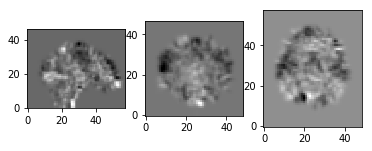

In [5]:
utils.show_slices([
    data[0, 0, 24, :, :].cpu().numpy(),
    data[0, 0, :, 29, :].cpu().numpy(),
    data[0, 0, :, :, 28].cpu().numpy(),
])

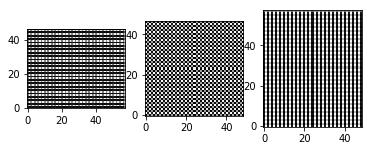

In [6]:
utils.show_slices([
    out[0, 0, 24, :, :].cpu().numpy(),
    out[0, 0, :, 29, :].cpu().numpy(),
    out[0, 0, :, :, 28].cpu().numpy(),
])

### After 10 epochs

In [11]:
encoder.load_state_dict(torch.load('models/final_conv_encoder'))
decoder.load_state_dict(torch.load('models/final_conv_decoder'))

with torch.no_grad():
    running_loss = 0.0
    encoder.eval()
    decoder.eval()
    for data in validloader:
        x = data.to(device)
        out = decoder(encoder(x))
        loss = criterion(x, out)
        print("batch loss: {}".format(loss.item()))
        running_loss += loss.item() * data.size(0)
        break
    print("Average loss: {}".format(running_loss / len(validset)))

batch loss: 0.021326858550310135
Average loss: 1.1293612873496152e-06


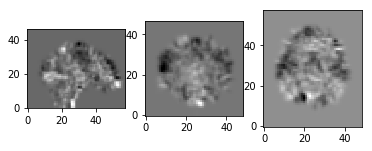

In [12]:
utils.show_slices([
    data[0, 0, 24, :, :].cpu().numpy(),
    data[0, 0, :, 29, :].cpu().numpy(),
    data[0, 0, :, :, 28].cpu().numpy(),
])

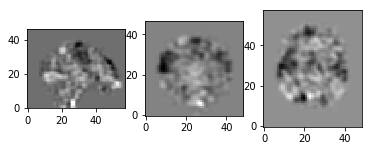

In [13]:
utils.show_slices([
    out[0, 0, 24, :, :].cpu().numpy(),
    out[0, 0, :, 29, :].cpu().numpy(),
    out[0, 0, :, :, 28].cpu().numpy(),
])